In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
pima = pd.read_csv("diabetes.csv")

pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
dataset = pima.values
X = dataset[:, 0:8]  # الخصائص
y = dataset[:, 8]    # التسميات

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # 70% تدريب و30% اختبار


In [5]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=1)

clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, random_state=1)

In [6]:
y_pred = clf.predict(X_test)

input_data = [4, 110, 92, 0, 0, 37.6, 0.191, 30]
print("التنبؤ للمدخل {}:".format(input_data), clf.predict([input_data]))

test_index = 5
print("عينة الاختبار:", X_test[test_index])
print("التنبؤ لهذه العينة:", clf.predict([X_test[test_index]]))

accuracy = metrics.accuracy_score(y_test, y_pred)  # دقة النموذج
confusion = metrics.confusion_matrix(y_test, y_pred)  # مصفوفة الالتباس
classification_report = metrics.classification_report(y_test, y_pred)  # تقرير التصنيف

print("\nالدقة:", accuracy)
print("\nمصفوفة الالتباس:\n", confusion)
print("\nتقرير التصنيف:\n", classification_report)


التنبؤ للمدخل [4, 110, 92, 0, 0, 37.6, 0.191, 30]: [0.]
عينة الاختبار: [  0.    119.     66.     27.      0.     38.8     0.259  22.   ]
التنبؤ لهذه العينة: [0.]

الدقة: 0.7835497835497836

مصفوفة الالتباس:
 [[125  21]
 [ 29  56]]

تقرير التصنيف:
               precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       146
         1.0       0.73      0.66      0.69        85

    accuracy                           0.78       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



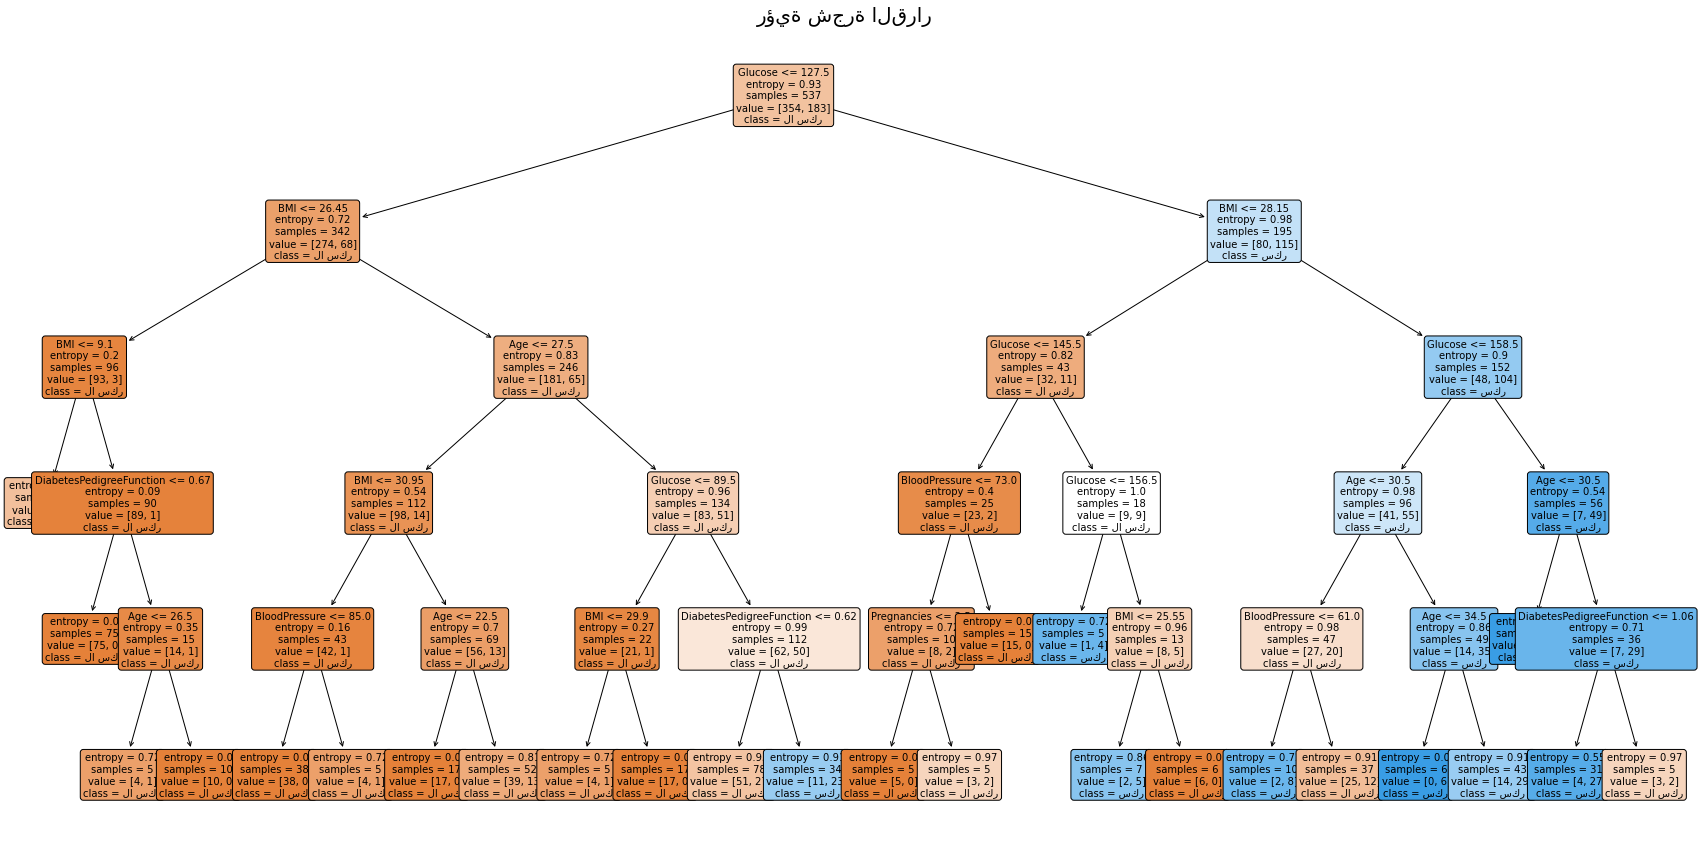

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(30,15))  
plot_tree(
    clf,
    feature_names=pima.columns[:-1],
    class_names=['لا سكر', 'سكر'], 
    filled=True,                      
    rounded=True,                    
    fontsize=10,                      
    precision=2                       
)
plt.title('رؤية شجرة القرار', fontsize=20) 
plt.show()


In [8]:
tree_rules = export_text(clf, feature_names=list(pima.columns[:-1]))
print("\nقواعد شجرة القرار:\n", tree_rules)



قواعد شجرة القرار:
 |--- Glucose <= 127.50
|   |--- BMI <= 26.45
|   |   |--- BMI <= 9.10
|   |   |   |--- class: 0.0
|   |   |--- BMI >  9.10
|   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |--- class: 0.0
|   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- class: 0.0
|   |--- BMI >  26.45
|   |   |--- Age <= 27.50
|   |   |   |--- BMI <= 30.95
|   |   |   |   |--- BloodPressure <= 85.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- BloodPressure >  85.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- BMI >  30.95
|   |   |   |   |--- Age <= 22.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Age >  22.50
|   |   |   |   |   |--- class: 0.0
|   |   |--- Age >  27.50
|   |   |   |--- Glucose <= 89.50
|   |   |   |   |--- BMI <= 29.90
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- BMI >  29.90
|   |   |   